# Notebook sobre estadísticas de Pokémon
- Alvarado Morán Óscar

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

from selenium import webdriver
from selenium.webdriver.firefox.options import Options

options = Options()
options.add_argument('--headless')

import bs4
from bs4 import BeautifulSoup

# Datasets existentes

El siguiente dataset se obtuvo desde kaggel y contiene estadísticas de los pokemon desde la primera hasta la séptima generación. 

https://www.kaggle.com/rounakbanik/pokemon

In [165]:
gen_1_7 = pd.read_csv('datos/pokemon.csv')
index = pd.Series(range(1, len(gen_1_7)+1))
gen_1_7 = gen_1_7.set_index([index])
gen_1_7.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
3,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
5,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


El siguiente dataset se obtuvo desde un repositorio de GitHub y contiene estadísticas de los pokémon disponibles para la octava generación:

https://github.com/yaylinda/serebii-parser/tree/master/data

In [215]:
gen_8_disponibles = pd.read_csv('datos/PokeDex8.csv')
gen_8_disponibles.head()

,No.,Name,Ability1,Ability2,Hidden_Ability,Type1,Type2,HP,Att,Def,S.Att,S.Def,Spd,Weight_kg,Height_m,Weight_lbs,Height_ft,Cap_Rate,Egg_Steps,Classification
0,1,Grookey,Overgrow,NaN,Grassy Surge,grass,NaN,50,65,50,40,40,65,5.0,0.3,11.0,1.000,45.0,5120.0,Chimp Pokémon
1,2,Thwackey,Overgrow,NaN,Grassy Surge,grass,NaN,70,85,70,55,60,80,14.0,0.7,30.9,2.333,45.0,5120.0,Beat Pokémon
2,3,Rillaboom,Overgrow,NaN,Grassy Surge,grass,NaN,100,125,90,60,70,85,90.0,2.1,198.4,6.917,45.0,5120.0,Drummer Pokémon
3,4,Scorbunny,Blaze,NaN,Libero,fire,NaN,50,71,40,40,40,69,4.5,0.3,9.9,1.000,45.0,5120.0,Rabbit Pokémon
4,5,Raboot,Blaze,NaN,Libero,fire,NaN,65,86,60,55,60,94,9.0,0.6,19.8,2.000,45.0,5120.0,Rabbit Pokémon


# Web Scrapping

- BeautifulSouphttps, biblioteca para manejar datos provenientes de HTML o xml:

    www.crummy.com/software/BeautifulSoup/bs4/doc/
    
- Selenium, biblioteca para conectarse a sitios web:

    https://www.selenium.dev/documentation/en/

In [6]:
class iniciador_ws():
    def __init__(self, url):
        profile = webdriver.FirefoxProfile()
        #profile.set_preference("browser.privatebrowsing.autostart", False)

        self.browser = webdriver.Firefox(firefox_profile = profile, options = options)
        self.browser.implicitly_wait(10)
        self.browser.get(url)
        
    def iniciar(self):
        content = self.browser.page_source
        soup = BeautifulSoup(content)
        
        return soup
        
    def cerrar(self):
        self.browser.quit()

### Tabla de tipos

Se utiliza web scrapping para obtener datos de una figura con la tabla de los tipos disponible en https://www.serebii.net/games/type.shtml 

**Unas líneas abajo se encuentra el código para descargar directamente el archivo csv y no tener que correr la siguiente celda, ya que tarda en hacer la consulta**

In [235]:
url = 'https://www.serebii.net/games/type.shtml'
ws = iniciador_ws(url)
soup = ws.iniciar()

# Aquí se seleccionan los datos que se necesitan.
lista = []
for idx, a in enumerate(soup.findAll('table', attrs = {'class': 'dextable'})):
    for name in a.findAll('td', attrs = {'class': 'cen'}):
        # Aquí metemos los tipos
        if name.a:
            if len(name.findAll('a')) == 2:
                lista.extend([name.findAll('a')[0].contents[0]['title'], 
                              name.findAll('a')[1].contents[0]['title']])
            else:
                lista.extend([name.a.contents[0]['title'], np.nan])
        else:
            # Aquí metemos el daño
            if type(name.contents[0]) == bs4.element.Tag:
                if name.contents[0].contents == []:
                    if 'No ' in name.contents[0]['title']:
                        lista.append(0)
                    elif '0.5 ' in name.contents[0]['title']:
                        lista.append(0.5)
                    elif '0.25 ' in name.contents[0]['title']:
                        lista.append(0.25)
                    else:
                        lista.append(name.contents[0]['title'][1:2])
            #Aquí metemos el daño *1
            elif type(name.contents[0]) == bs4.element.NavigableString:
                lista.append(1)
# Esto cierra la ventana emergente del navegador               
ws.cerrar()
lista = np.asarray(lista)

In [251]:
matriz = lista.reshape((len(lista)//19, 19))
df_types = pd.DataFrame(matriz, columns = ['type1', 'type2'] + list(matriz[:17,0]))
df_types.to_csv('datos/Type_chart.csv', index = False)

### Dataframe de la tabla de tipos desde archivo csv

In [254]:
df_type = pd.read_csv('datos/Type_chart.csv')
df_type = df_type.set_index(['type1','type2'])
df_type.head()

,,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel
type1,type2,,,,,,,,,,,,,,,,,
Normal,NaN,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
Fire,NaN,1.0,0.5,2.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5
Water,NaN,1.0,0.5,0.5,2.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
Electric,NaN,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5
Grass,NaN,1.0,2.0,0.5,0.5,0.5,2.0,1.0,2.0,0.5,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0


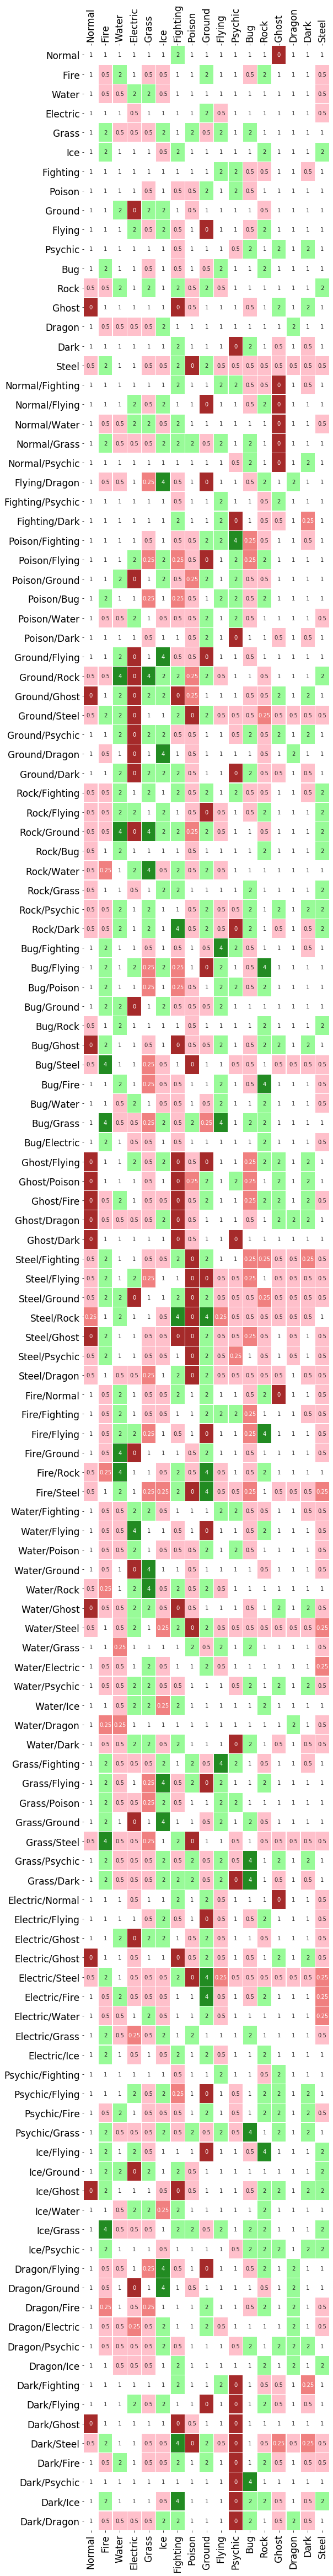

In [282]:
array = np.asarray(df_type).astype(float)
heatmap = ['brown', 'lightcoral', 'pink', 'white', 'white', 'white', 'white', 
           'white', 'palegreen', 'palegreen', 'palegreen', 'palegreen','palegreen', 
           'palegreen', 'palegreen', 'palegreen', 'forestgreen']
fig, ax = plt.subplots(figsize = (8.5, 65))

p = sns.heatmap(array, cmap = heatmap, linewidths = 0.3, ax = ax, annot = True, cbar = False)
a = [indice[0] for indice in df_type.index[:17]]
b = [indice[0]+'/'+indice[1] for indice in df_type.index[17:]]
ax.set_yticklabels(a+b, rotation = 'horizontal', fontsize = 17)
ax.set_xticklabels(a, rotation = 'vertical', fontsize = 17)
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)
plt.savefig('visualizacion/Type_chart.png')

### Nutriendo datasets

Código para obtener nombres de los pokemon faltantes de las séptima generación

In [206]:
url_new_gen7 = 'https://www.serebii.net/pokedex-sm'
ws = iniciador_ws(url_new_gen7)
soup = ws.iniciar()

# Aquí se seleccionan los datos que se necesitan.
dic_nombres = {}
for form in soup.findAll('form', attrs = {'name': 'nav8'}):
    for poke in form.findAll('option'):
        try:
            if int(poke.contents[0][:3]) >= 802:
                dic_nombres[poke.contents[0][5:]] = {'pokedex_number': int(poke.contents[0][:3])}
        except:
            pass
        
ws.cerrar()

Código para obtener nombres de los pokemon de octava generación.

In [207]:
url_gen8 = 'https://www.serebii.net/pokedex-swsh'
ws = iniciador_ws(url_gen8)
soup = ws.iniciar()

for form in soup.findAll('form', attrs = {'name': 'nav9'}):
    for poke in form.findAll('option'):
        if poke.contents[0][0] == '8' or poke.contents[0][0] == '?':
            try:
                dic_nombres[str(poke.contents[0][4:]).lower().replace(' ', '')] = {'pokedex_number': int(poke.contents[0][:3])}
            except:
                dic_nombres[str(poke.contents[0][4:]).lower().replace(' ', '')] = {'pokedex_number': poke.contents[0][:3]}
                
ws.cerrar()

In [208]:
dic_nombres

{'Marshadow': {'pokedex_number': 802},
 'Poipole': {'pokedex_number': 803},
 'Naganadel': {'pokedex_number': 804},
 'Stakataka': {'pokedex_number': 805},
 'Blacephalon': {'pokedex_number': 806},
 'Zeraora': {'pokedex_number': 807},
 'Meltan': {'pokedex_number': 808},
 'Melmetal': {'pokedex_number': 809},
 'grookey': {'pokedex_number': 810},
 'thwackey': {'pokedex_number': 811},
 'rillaboom': {'pokedex_number': 812},
 'scorbunny': {'pokedex_number': 813},
 'raboot': {'pokedex_number': 814},
 'cinderace': {'pokedex_number': 815},
 'sobble': {'pokedex_number': 816},
 'drizzile': {'pokedex_number': 817},
 'inteleon': {'pokedex_number': 818},
 'skwovet': {'pokedex_number': 819},
 'greedent': {'pokedex_number': 820},
 'rookidee': {'pokedex_number': 821},
 'corvisquire': {'pokedex_number': 822},
 'corviknight': {'pokedex_number': 823},
 'blipbug': {'pokedex_number': 824},
 'dottler': {'pokedex_number': 825},
 'orbeetle': {'pokedex_number': 826},
 'nickit': {'pokedex_number': 827},
 'thievul':

### Extrayendo datos para el dataset

In [61]:
def limpiar(elemento):
    try:
        elemento = elemento.tbody.tr.contents[2].get_text()
    except:
        pass
    try:
        elemento = elemento.img.attrs['alt']
    except:
        pass
    try:
        elemento = elemento.b.get_text()
    except:
        pass
   
    if 'Base Stats' in elemento:
        elemento = elemento[-3:]

    return elemento

In [230]:
def limpiar2(lista):
    boolean_array = np.array([True for _ in range(22)])
    boolean_array[[-9,-8]] = False
    lista = list(np.array(lista)[boolean_array])
    lista[2] = lista[2][1:]
    try:
        lista[3] = np.float(lista[3][:-1])
    except:
        lista[3] = np.nan
    lista[5] = lista[5][2].replace('\n\t\t\t','')[:-1]
    lista[6] = lista[6][2].replace('\n\t\t\t','')[:-2]
    lista[8] = int(lista[8].replace(',',''))
    if len(lista[9]) > 1:
        lista.insert(10, lista[9][2])
        lista[10] = lista[10][:-5].lower()
    else:
        lista.insert(10, np.nan)
    lista[9] = lista[9][0][:-5].lower()
    lista[12] = int(lista[12][0][:-7].replace(',',''))
    
    return lista

Se extrae la información de la página web https://www.serebii.net/ para los pokémon faltantes de la séptima generación del dataset `gen_1_7` y además la de los pokémon de la octava generación.

In [231]:
caracteristicas = ['name', 'japanese_name', 'pokedex_number', 'percentage_male', 'classification', 'height_m', 
                   'weight_kg', 'capture_rate', 'base_egg_steps', 'type1', 'type2', 'abilities', 'experience_growth', 
                   'base_happiness', 'base_total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed',
                   'generation', 'is_legendary']
diccionario_nuevos = {}
for num, name in enumerate(list(dic_nombres.keys())[:-4]):
    num = num + 802
    if num < 810:
        ws = iniciador_ws(f'https://www.serebii.net/pokedex-sm/{num}.shtml')
        gen, leg = [7, 1]
    else:
        ws = iniciador_ws(f'https://www.serebii.net/pokedex-swsh/{name}')
        gen = 8
        if num < 888:
            leg = 0
        else:
            leg = 1
    soup = ws.iniciar()
    
    a = soup.findAll('table', attrs = {'class': 'dextable'})
    b = [elm for elm in a]
    c = [len(elm.findAll('td', attrs = {'class': 'fooevo', 'colspan': '8'})) for elm in b]
    variable = np.argmax(c)
    if (num == 808) or (num == 809):
        variable = 10
            
    lista = []
    for idx, table in enumerate(soup.findAll('table', attrs = {'class': 'dextable'})):
        if idx == 1 or idx == 2 or idx == variable:
            for indice, info in enumerate(table.findAll('td', attrs = {'class': 'fooinfo'})):
                try:
                    if str(info.contents[0]) == 'Max Stats':
                        break
                    if len(info.contents) > 1:
                        if len(info.findAll('a')) > 0:
                            habilidades = []
                            for elm in info.findAll('a'):
                                try:
                                    habilidades.append(elm.b.get_text())
                                except:
                                    pass
                            lista.append(habilidades)
                        else:
                            lista.append([limpiar(inf) for inf in info.contents])
                    else: 
                        lista.append(limpiar(info.contents[0]))
                except:
                    lista.append(np.nan)
            for cen in table.findAll('td', attrs = {'class': 'cen'}):
                lista.append([limpiar(c) for c in cen.contents])
                   
    
    lista = limpiar2(lista) + [gen, leg]
    print(f'{lista}\n-----------------------------------------------------------------------------')
    diccionario_nuevos[f'{num}'] = dict(zip(caracteristicas, lista))
    ws.cerrar()

['Marshadow', 'Marshadowマーシャドー', '802', nan, 'Gloomdweller Pokémon', '0.7', '22.2', '3', 30720, 'fighting', 'ghost', ['Technician'], 1250000, '0', '600', '90', '125', '80', '90', '90', '125', 7, 1]
-----------------------------------------------------------------------------
['Poipole', 'Bevenomベベノム', '803', nan, 'Poison Pin Pokémon', '0.6', '1.8', '3', 30720, 'poison', nan, ['Beast Boost'], 1250000, '0', '420', '67', '73', '67', '73', '67', '73', 7, 1]
-----------------------------------------------------------------------------
['Naganadel', 'Agoyonアーゴヨン', '804', nan, 'Poison Pin Pokémon', '3.6', '150', '3', 30720, 'poison', 'dragon', ['Beast Boost'], 1250000, '0', '540', '73', '73', '73', '127', '73', '121', 7, 1]
-----------------------------------------------------------------------------
['Stakataka', 'Tsundetsundeツンデツンデ', '805', nan, 'Rampart Pokémon', '5.5', '820', '3', 30720, 'rock', 'steel', ['Beast Boost'], 1250000, '0', '570', '61', '131', '211', '53', '101', '13', 7, 1]
--

['Chewtle', 'カムカメ', '833', 50.2, 'Snapping Pokémon', '0.3', '8.5', '255', 5120, 'water', nan, ['Strong Jaw', 'Shell Armor', 'Swift Swim'], 1000000, nan, '284', '50', '64', '50', '38', '38', '44', 8, 0]
-----------------------------------------------------------------------------
['Drednaw', 'カジリガメ', '834', 50.2, 'Bite Pokémon', '1', '115.5', '75', 5120, 'water', 'rock', ['Strong Jaw', 'Shell Armor', 'Swift Swim'], 1000000, nan, '485', '90', '115', '90', '48', '68', '74', 8, 0]
-----------------------------------------------------------------------------
['Yamper', 'ワンパチ', '835', 50.2, 'Puppy Pokémon', '0.3', '13.5', '255', 5120, 'electric', nan, ['Ball Fetch', 'Rattled'], 800000, nan, '270', '59', '45', '50', '40', '50', '26', 8, 0]
-----------------------------------------------------------------------------
['Boltund', 'パルスワン', '836', 50.2, 'Dog Pokémon', '1', '34', '45', 5120, 'electric', nan, ['Strong Jaw', 'Competitive'], 800000, nan, '490', '69', '90', '60', '90', '60', '121', 8,

['Perrserker', 'ニャイキング', '863', 50.2, 'Viking Pokémon', '0.8', '28', '90', 5120, 'steel', nan, ['Battle Armor', 'Tough Claws', 'Steely Spirit'], 1000000, nan, '440', '70', '110', '100', '50', '60', '50', 8, 0]
-----------------------------------------------------------------------------
['Cursola', 'サニゴーン', '864', 24.9, 'Coral Pokémon', '1', '0.4', '30', 5120, 'ghost', nan, ['Weak Armor', 'Perish Body'], 800000, nan, '510', '60', '95', '50', '145', '130', '30', 8, 0]
-----------------------------------------------------------------------------
["Sirfetch'd", 'ネギガナイト', '865', 50.2, 'Wild Duck Pokémon', '0.8', '117', '45', 5120, 'fighting', nan, ['Steadfast', 'Scrappy'], 1000000, nan, '507', '62', '135', '95', '68', '82', '65', 8, 0]
-----------------------------------------------------------------------------
['Mr. Rime', 'バリコオル', '866', 50.2, 'Comedian Pokémon', '1.5', '58.2', '45', 6400, 'ice', 'psychic', ['Tangled Feet', 'Screen Cleaner', 'Ice Body'], 1000000, nan, '520', '80', '85',

## Creando dataset completo

In [232]:
df_maestro = gen_1_7
for llave in list(diccionario_nuevos.keys()):
    df_maestro = df_maestro.append(diccionario_nuevos[llave], ignore_index = True)
df_maestro.tail()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
885,"[Clear Body, Infiltrator, Cursed Body]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.2,886,60,50,102,dragon,ghost,11,8,0
886,"[Clear Body, Infiltrator, Cursed Body]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.2,887,100,75,142,dragon,ghost,50,8,0
887,[Intrepid Sword],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,888,80,115,138,fairy,NaN,110,8,1
888,[Dauntless Shield],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,889,80,115,138,fighting,NaN,210,8,1
889,[Pressure],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,890,145,95,130,poison,dragon,950,8,1


In [233]:
df_maestro.to_csv('datos/pokemon_completo.csv')

In [192]:
a = eval(df_maestro.iloc[0,0])
type(a)

list